In [38]:
import netCDF4 as nc
from netCDF4 import Dataset
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# gsw oceanic toolbox: http://www.teos-10.org/pubs/Getting_Started.pdf
import gsw
from scipy.io import loadmat
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

import sys
sys.path.append('../..')
from src.data.functions import safe_log, convert_datetime
from src.utils.directories import get_parent_directory

In [123]:
parent_dir = get_parent_directory()

# five cruises from the Nansen Legacy

# MSS, so dimensions of profile and time
GOS2020113_nc = os.path.join(parent_dir, "data/external/Microstructure/nansen_legacy/GOS2020113/MERGED_EPSI.nc")
GOS2020113_ds = xr.open_dataset(GOS2020113_nc)

# MSS, so dimensions of profile and time
KH2021702_nc = os.path.join(parent_dir, "data/external/Microstructure/nansen_legacy/KH2021702/MERGED_EPSI.nc")
KH2021702_ds = xr.open_dataset(KH2021702_nc)

# MSS, so dimensions of profile and time
KB2022625_nc = os.path.join(parent_dir, "data/external/Microstructure/nansen_legacy/KB2022625/MERGED_EPSI.nc")
KB2022625_ds = xr.open_dataset(KB2022625_nc)

# VMP, so dimensions of profile and depth
KH2018709_nc = os.path.join(parent_dir, "data/external/Microstructure/nansen_legacy/KH2018709/KH2018709_VMP.nc")
KH2018709_ds = xr.open_dataset(KH2018709_nc)

# VMP, so dimensions of profile and depth
KB2018616_nc = os.path.join(parent_dir, "data/external/Microstructure/nansen_legacy/KB2018616/KB2018616_VMP.nc")
KB2018616_ds = xr.open_dataset(KB2018616_nc)

## Convert VMP into profile, depth dimensions

These are already binned to 1m

In [95]:
KH2018709_ds["profile"] = KH2018709_ds["TIME"].count()
KH2018709_ds['profile'] = xr.DataArray(range(1,len(KH2018709_ds['TIME'])+1), dims='TIME')
KH2018709_ds = KH2018709_ds.swap_dims({'TIME': 'profile'})

In [82]:
KB2018616_ds["profile"] = KB2018616_ds["TIME"].count()
KB2018616_ds['profile'] = xr.DataArray(range(1,len(KB2018616_ds['TIME'])+1), dims='TIME')
KB2018616_ds = KB2018616_ds.swap_dims({'TIME': 'profile'})

In [93]:
KB2018616_ds

<xarray.Dataset>
Dimensions:    (profile: 197, DEPTH: 939)
Coordinates:
    TIME       (profile) datetime64[ns] 2018-06-29T07:59:34.000003562 ... 201...
  * profile    (profile) int64 1 2 3 4 5 6 7 8 ... 191 192 193 194 195 196 197
Dimensions without coordinates: DEPTH
Data variables:
    LATITUDE   (profile) float64 ...
    LONGITUDE  (profile) float64 ...
    BDEPTH     (profile) float64 ...
    PRES       (profile, DEPTH) float64 ...
    TEMP       (profile, DEPTH) float64 ...
    PSAL       (profile, DEPTH) float64 ...
    eps        (profile, DEPTH) float64 ...
Attributes: (12/30)
    title:                   Vertical Microstructure Profiler (VMP) data from...
    history:                 Version 1
    summary:                 Ocean microstructure profiles from a physical oc...
    comment:                 VMP2000 has a pumped CTD system. \nOnly downcast...
    type:                    Microstructure profiler 2-dbar pressure averaged...
    creation_time:           2020-02-17T10:20:38Z
    ...                      ...
    keywords:                North of Svalbard, Arctic Ocean, turbulence, mixing
    creator_name:            Ilker Fer
    creator_email:           ilker.fer@uib.no
    creator_url:             https://www.uib.no/gfi
    acknowledgement:         This data set is made possible by the funding fr...
    date_created:            2020-02-17

## Convert MSS into profile, depth dimensions

assuming isotropy

(array([3.2963e+04, 1.1900e+02, 1.5400e+02, 6.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0.14389389,  4.3092577 ,  8.47462152, 12.63998533, 16.80534914,
        20.97071295, 25.13607676, 29.30144058, 33.46680439, 37.6321682 ,
        41.79753201]),
 <BarContainer object of 10 artists>)

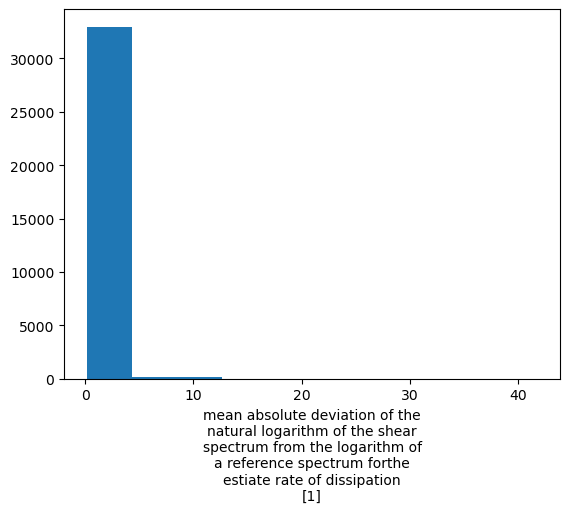

In [130]:
GOS2020113_ds.MAD.plot()

In [129]:
GOS2020113_ds

<xarray.Dataset>
Dimensions:                (PROFILE: 206, depth: 144, N_SHEAR_SENSORS: 2)
Coordinates:
    DEPTH                  (PROFILE, depth) float64 4.376 5.712 ... nan nan
Dimensions without coordinates: PROFILE, depth, N_SHEAR_SENSORS
Data variables: (12/20)
    TIME                   (PROFILE, depth) datetime64[ns] ...
    EPSI                   (PROFILE, N_SHEAR_SENSORS, depth) float64 ...
    EPSI_FINAL             (PROFILE, depth) float64 ...
    KMAX                   (PROFILE, N_SHEAR_SENSORS, depth) float64 ...
    SECTION_NUMBER         (PROFILE, depth) int32 ...
    PSPD_REL               (PROFILE, depth) float64 ...
    ...                     ...
    MAD                    (PROFILE, N_SHEAR_SENSORS, depth) float64 ...
    VAR_RESOLVED           (PROFILE, N_SHEAR_SENSORS, depth) float64 ...
    EPSI_STD               (PROFILE, N_SHEAR_SENSORS, depth) float64 ...
    DESPIKE_PASS_COUNT_SH  (PROFILE, N_SHEAR_SENSORS, depth) float64 ...
    TRANS_ERR_FRACTION     (PROFILE, depth) float64 ...
    EPSI_FLAGS             (PROFILE, N_SHEAR_SENSORS, depth) int32 ...
Attributes: (12/53)
    title:                         Ocean microstructure measurements using an...
    summary:                       Ocean microstructure profiles were collect...
    platform_type:                 research vessel
    comment:                       Profiles were obtained using an MSS (Micro...
    conventions:                   CF-1.6, ACDD-1.3, ATOMIX
    history:                       Version 1
    ...                            ...
    despike_iterations_limit:      8.0
    HP_cut:                        0.5
    goodman:                       1.0
    creation_time:                 2023-06-08T16:21:23Z
    date_update:                   2023-06-08T16:21:23Z
    date_created:                  2023-06-08

In [124]:
GOS2020113_ds["DEPTH"] = np.abs(gsw.z_from_p(GOS2020113_ds["PRES"], 0)) 
GOS2020113_ds = GOS2020113_ds.assign_coords(DEPTH=GOS2020113_ds["DEPTH"])
GOS2020113_ds = GOS2020113_ds.rename_dims({"TIME_DIM": "depth", "SECTIONS": "PROFILE"})


In [125]:
GOS2020113_ds_renamed = GOS2020113_ds.rename({"EPSI_FINAL": "eps", "TEMP": "T", "LON": "longitude", "LAT": "latitude", ""})

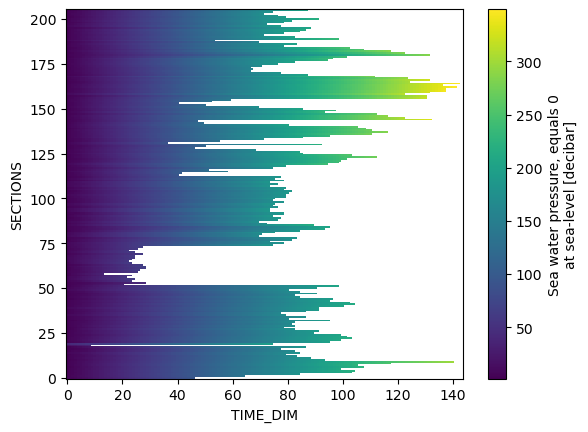

In [116]:
GOS2020113_ds["PRES"].plot()

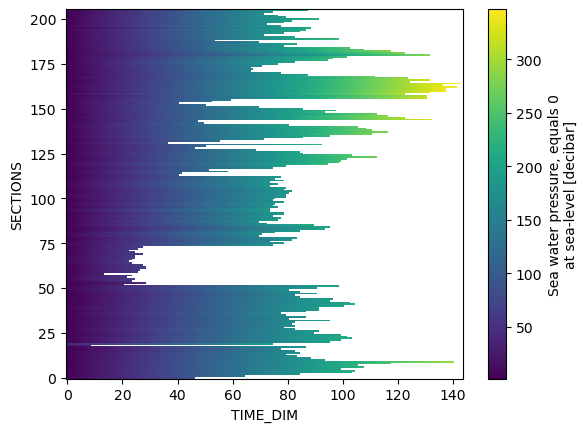

In [117]:
# Assume time dimension is depth too
GOS2020113_ds["depth"].plot()

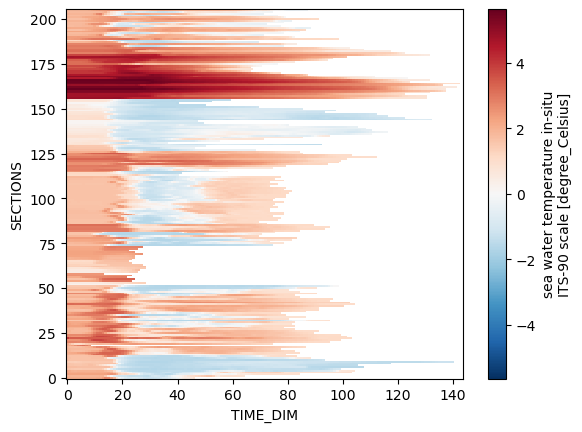

In [108]:
GOS2020113_ds.TEMP.plot()

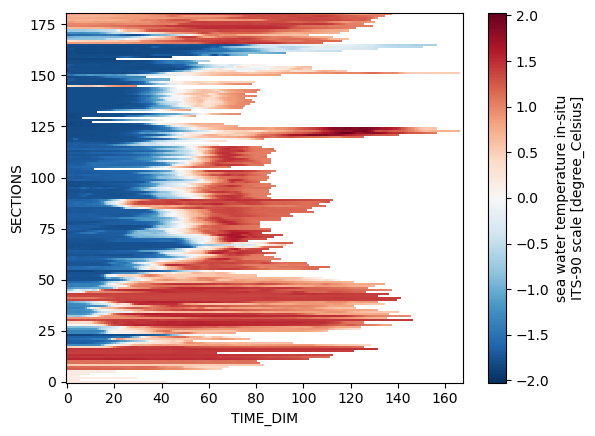

In [109]:
KH2021702_ds.TEMP.plot()

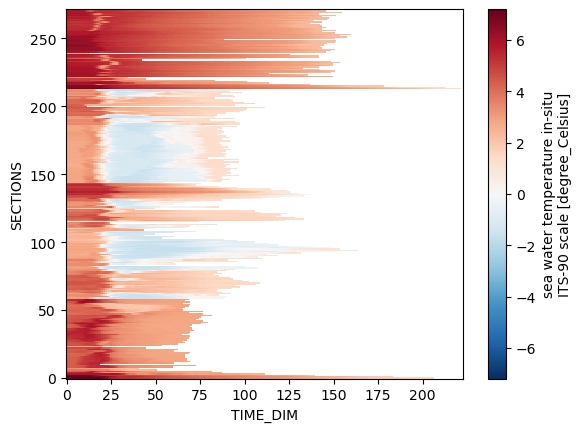

In [110]:
KB2022625_ds.TEMP.plot()

In [92]:
hola 

<xarray.Dataset>
Dimensions:                (SECTIONS: 206, TIME_DIM: 144, N_SHEAR_SENSORS: 2)
Coordinates:
    DEPTH                  (SECTIONS, TIME_DIM) float64 -4.376 -5.712 ... nan
Dimensions without coordinates: SECTIONS, TIME_DIM, N_SHEAR_SENSORS
Data variables: (12/21)
    TIME                   (SECTIONS, TIME_DIM) datetime64[ns] ...
    EPSI                   (SECTIONS, N_SHEAR_SENSORS, TIME_DIM) float64 ...
    EPSI_FINAL             (SECTIONS, TIME_DIM) float64 ...
    KMAX                   (SECTIONS, N_SHEAR_SENSORS, TIME_DIM) float64 ...
    SECTION_NUMBER         (SECTIONS, TIME_DIM) int32 ...
    PSPD_REL               (SECTIONS, TIME_DIM) float64 ...
    ...                     ...
    VAR_RESOLVED           (SECTIONS, N_SHEAR_SENSORS, TIME_DIM) float64 ...
    EPSI_STD               (SECTIONS, N_SHEAR_SENSORS, TIME_DIM) float64 ...
    DESPIKE_PASS_COUNT_SH  (SECTIONS, N_SHEAR_SENSORS, TIME_DIM) float64 ...
    TRANS_ERR_FRACTION     (SECTIONS, TIME_DIM) float64 ...
    EPSI_FLAGS             (SECTIONS, N_SHEAR_SENSORS, TIME_DIM) int32 ...
    depth                  (SECTIONS, TIME_DIM) float64 -4.376 -5.712 ... nan
Attributes: (12/53)
    title:                         Ocean microstructure measurements using an...
    summary:                       Ocean microstructure profiles were collect...
    platform_type:                 research vessel
    comment:                       Profiles were obtained using an MSS (Micro...
    conventions:                   CF-1.6, ACDD-1.3, ATOMIX
    history:                       Version 1
    ...                            ...
    despike_iterations_limit:      8.0
    HP_cut:                        0.5
    goodman:                       1.0
    creation_time:                 2023-06-08T16:21:23Z
    date_update:                   2023-06-08T16:21:23Z
    date_created:                  2023-06-08

In [88]:
GOS2020113_ds_reshaped = GOS2020113_ds.assign_coords(DEPTH=GOS2020113_ds["depth"])

KeyError: 'depth'

In [69]:
GOS2020113_ds_reshaped = GOS2020113_ds.expand_dims({"depth": GOS2020113_ds["depth"]})

ValueError: depth already exists as coordinate or variable name.

In [52]:
GOS2020113_ds

<xarray.Dataset>
Dimensions:                (SECTIONS: 206, TIME_DIM: 144, N_SHEAR_SENSORS: 2)
Dimensions without coordinates: SECTIONS, TIME_DIM, N_SHEAR_SENSORS
Data variables: (12/20)
    TIME                   (SECTIONS, TIME_DIM) datetime64[ns] ...
    EPSI                   (SECTIONS, N_SHEAR_SENSORS, TIME_DIM) float64 ...
    EPSI_FINAL             (SECTIONS, TIME_DIM) float64 ...
    KMAX                   (SECTIONS, N_SHEAR_SENSORS, TIME_DIM) float64 ...
    SECTION_NUMBER         (SECTIONS, TIME_DIM) int32 ...
    PSPD_REL               (SECTIONS, TIME_DIM) float64 ...
    ...                     ...
    MAD                    (SECTIONS, N_SHEAR_SENSORS, TIME_DIM) float64 ...
    VAR_RESOLVED           (SECTIONS, N_SHEAR_SENSORS, TIME_DIM) float64 ...
    EPSI_STD               (SECTIONS, N_SHEAR_SENSORS, TIME_DIM) float64 ...
    DESPIKE_PASS_COUNT_SH  (SECTIONS, N_SHEAR_SENSORS, TIME_DIM) float64 ...
    TRANS_ERR_FRACTION     (SECTIONS, TIME_DIM) float64 ...
    EPSI_FLAGS             (SECTIONS, N_SHEAR_SENSORS, TIME_DIM) int32 ...
Attributes: (12/53)
    title:                         Ocean microstructure measurements using an...
    summary:                       Ocean microstructure profiles were collect...
    platform_type:                 research vessel
    comment:                       Profiles were obtained using an MSS (Micro...
    conventions:                   CF-1.6, ACDD-1.3, ATOMIX
    history:                       Version 1
    ...                            ...
    despike_iterations_limit:      8.0
    HP_cut:                        0.5
    goodman:                       1.0
    creation_time:                 2023-06-08T16:21:23Z
    date_update:                   2023-06-08T16:21:23Z
    date_created:                  2023-06-08

In [53]:
GOS2020113_ds["depth"] = gsw.z_from_p(GOS2020113_ds["PRES"], 0) 

In [55]:
GOS2020113_ds.depth

<xarray.DataArray 'depth' (SECTIONS: 206, TIME_DIM: 144)>
array([[-4.37593714, -5.71227611, -6.80682071, ...,         nan,
                nan,         nan],
       [-3.17266476, -5.30178311, -7.60939339, ...,         nan,
                nan,         nan],
       [-3.75707797, -5.1738828 , -6.78106021, ...,         nan,
                nan,         nan],
       ...,
       [-3.50339188, -5.43362081, -7.21317218, ...,         nan,
                nan,         nan],
       [-3.18334829, -4.95939588, -6.75980273, ...,         nan,
                nan,         nan],
       [-2.67181772, -3.76796691, -5.01693597, ...,         nan,
                nan,         nan]])
Dimensions without coordinates: SECTIONS, TIME_DIM
Attributes:
    standard_name:  sea_water_pressure
    units:          decibar
    long_name:      Sea water pressure, equals 0 at sea-level

In [54]:
GOS2020113_ds

<xarray.Dataset>
Dimensions:                (SECTIONS: 206, TIME_DIM: 144, N_SHEAR_SENSORS: 2)
Dimensions without coordinates: SECTIONS, TIME_DIM, N_SHEAR_SENSORS
Data variables: (12/21)
    TIME                   (SECTIONS, TIME_DIM) datetime64[ns] ...
    EPSI                   (SECTIONS, N_SHEAR_SENSORS, TIME_DIM) float64 ...
    EPSI_FINAL             (SECTIONS, TIME_DIM) float64 ...
    KMAX                   (SECTIONS, N_SHEAR_SENSORS, TIME_DIM) float64 ...
    SECTION_NUMBER         (SECTIONS, TIME_DIM) int32 ...
    PSPD_REL               (SECTIONS, TIME_DIM) float64 ...
    ...                     ...
    VAR_RESOLVED           (SECTIONS, N_SHEAR_SENSORS, TIME_DIM) float64 ...
    EPSI_STD               (SECTIONS, N_SHEAR_SENSORS, TIME_DIM) float64 ...
    DESPIKE_PASS_COUNT_SH  (SECTIONS, N_SHEAR_SENSORS, TIME_DIM) float64 ...
    TRANS_ERR_FRACTION     (SECTIONS, TIME_DIM) float64 ...
    EPSI_FLAGS             (SECTIONS, N_SHEAR_SENSORS, TIME_DIM) int32 ...
    depth                  (SECTIONS, TIME_DIM) float64 -4.376 -5.712 ... nan
Attributes: (12/53)
    title:                         Ocean microstructure measurements using an...
    summary:                       Ocean microstructure profiles were collect...
    platform_type:                 research vessel
    comment:                       Profiles were obtained using an MSS (Micro...
    conventions:                   CF-1.6, ACDD-1.3, ATOMIX
    history:                       Version 1
    ...                            ...
    despike_iterations_limit:      8.0
    HP_cut:                        0.5
    goodman:                       1.0
    creation_time:                 2023-06-08T16:21:23Z
    date_update:                   2023-06-08T16:21:23Z
    date_created:                  2023-06-08

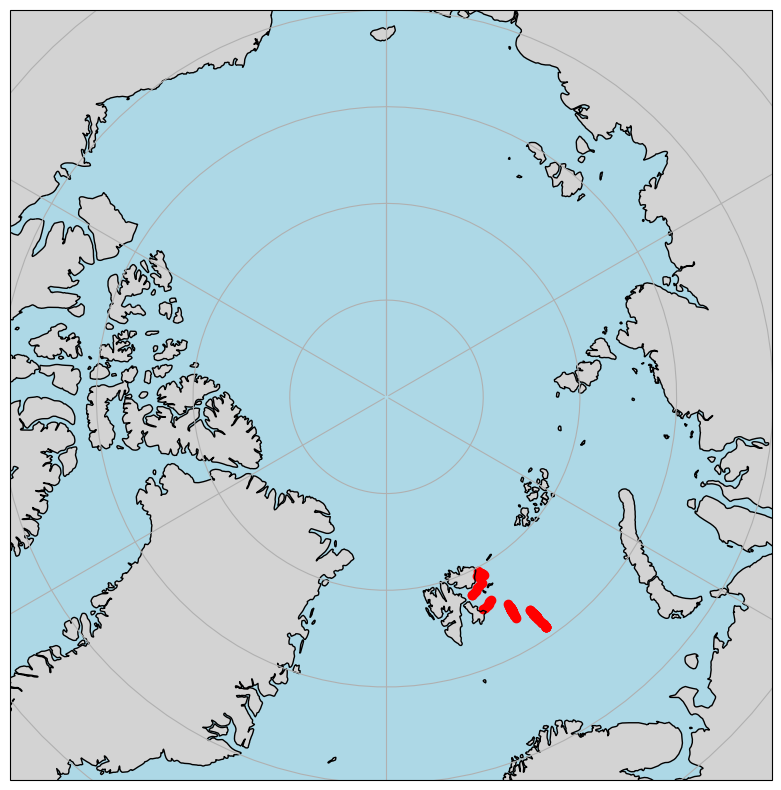

In [36]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure and axes with Azimuthal Equidistant projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.AzimuthalEquidistant(central_latitude=90))

# Plot the scatter points
ax.scatter(merged_epsi.LON, merged_epsi.LAT, transform=ccrs.PlateCarree(), color='red')

# Set the map extent and projection center
ax.set_global()
ax.set_extent([-180, 180, 70, 90], crs=ccrs.PlateCarree())

# Add land and ocean color
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines()

# Show the plot
plt.show()



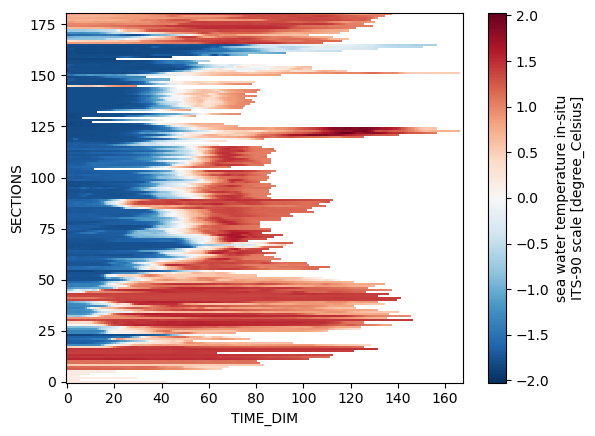

In [7]:
merged_epsi.TEMP.plot()

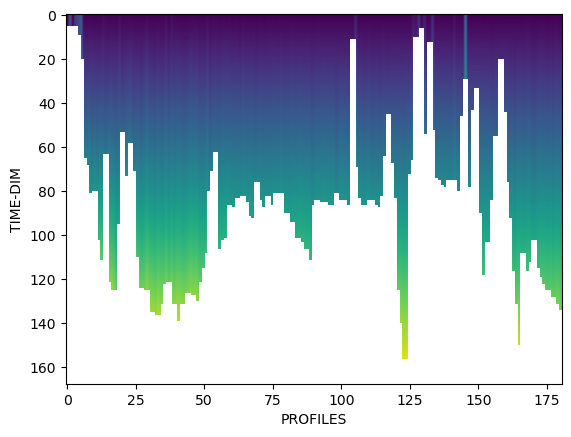

In [26]:
# Get the data for the plot
data = merged_epsi.PRES.values

# Create the plot with swapped axes
plt.imshow(np.transpose(data), aspect='auto', origin='lower')

# Set the labels for the swapped axes
plt.ylabel('TIME-DIM')
plt.xlabel('PROFILES')

# Invert the y-axis
plt.gca().invert_yaxis()

# Show the plot
plt.show()

(array([3.3883e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.87694114e-19, 1.70475083e+42, 3.40950166e+42, 5.11425249e+42,
        6.81900332e+42, 8.52375416e+42, 1.02285050e+43, 1.19332558e+43,
        1.36380066e+43, 1.53427575e+43, 1.70475083e+43]),
 <BarContainer object of 10 artists>)

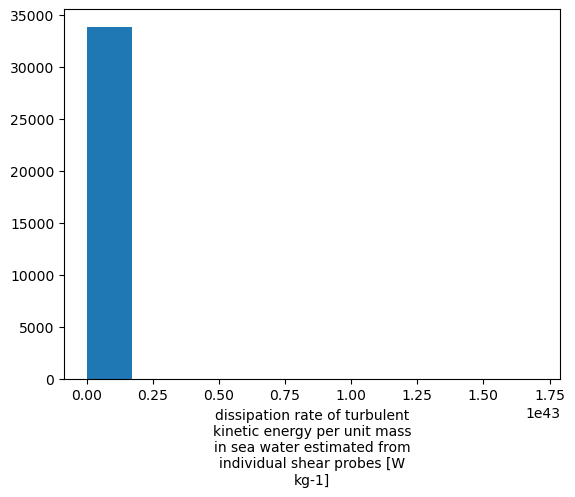

In [6]:
merged_epsi.EPSI.plot()

In [ ]:
merged_epsi

In [2]:
eps_ds = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/nansen_legacy/GOS2020113_EPSI.nc"
hi = Dataset(eps_ds)
hhh = xr.open_dataset(eps_ds)

MissingDimensionsError: 'TIME' has more than 1-dimension and the same name as one of its dimensions ('SECTIONS', 'TIME'). xarray disallows such variables because they conflict with the coordinates used to label dimensions.

In [18]:
ctd_ds = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/nansen_legacy/GOS2020113_CTD.nc"
hallo = Dataset(ctd_ds)

In [22]:
result = pd.concat([hi, hallo], axis=0)

TypeError: cannot concatenate object of type '<class 'netCDF4._netCDF4.Dataset'>'; only Series and DataFrame objs are valid

In [15]:
import glob
GOS2020113_files = glob.glob("/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/nansen_legacy/NC_GOS2020113/*")

# create an empty list to store the datasets
datasets = []

# loop through each file and open as xarray dataset
for file_path in GOS2020113_files:
    dataset = xr.open_dataset(file_path)
    datasets.append(dataset)

In [17]:
datasets[2]

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes: (12/87)
    platform_type:                      research vessel
    conventions:                        CF-1.6, ACDD-1.3, ATOMIX
    history:                            Version 1
    data_mode:                          D
    area:                               Arctic Ocean
    geospatial_lat_min:                 77.049
    ...                                 ...
    date_update:                        2023-02-13T22:28:00Z
    date_created:                       2023-02-13
    title:                              Ocean microstructure measurements usi...
    summary:                            Ocean microstructure profiles were co...
    comment:                            Profiles were obtained using an MSS (...
    citation:                           Fer, Ilker; Baumann, Till M.; Elliott...

In [ ]:
"/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/nansen_legacy"